# Keras入門

## Kerasとは

Keras は元々はTheano、TensorFLowなど複数のフレームワークを扱いやすくする ラッパー として登場したライブラリでしたが、後にTensorFLowの 高レベルAPI として使われるようになりました。
TensorFLowに含まれる形のKerasであるtf.kerasを主に使っていきます。

《ラッパーとは》
ラッパーはもともとのプログラムの機能を利用して、より使いやすいものを提供します。TensorFlowはニューラルネットワークに必要な計算を効率的に行う機能を提供しますが、初期のころはモデルを構築して学習を行うとなると手間がかかる部分もありました。そのため、TensorFlowをラップして、扱いやすくするKerasが登場しました。

《高レベルAPIとは》
大きな単位で機能を簡単に扱えるように作られたものが高レベルAPIです。対義語として、細かい単位で機能をいじれるが、扱いがその分大変な低レベルAPIがあります。
TensorFlow自体でもニューラルネットワークのモデル構築や学習を行いやすくするために、高レベルAPIの充実が進められています。tf.Kerasはそのひとつです。

Kerasでは簡素にニューラルネットワークが記述できます。その書き方にはSequentialモデルとFunctional APIの2種類があります。

In [1]:
#Kerasでロジスティック回帰によるANDゲートを作成

import numpy as np
# ANDゲートの学習データを用意
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[0],[0],[1]])

## Sequentialクラス

In [2]:
#Sequentialクラスを使用して全結合層を作成。

import tensorflow as tf     #1.13.1の仮想環境

model = tf.keras.Sequential([tf.keras.layers.Dense(1,                 #出力のユニット数
                                                   activation = tf.nn.sigmoid,      #活性化関数
                                                   input_shape=(2,))]                  #入力のユニット数
                           )

#Denseクラスは引数で重みの初期化方法、バイアスの有無などの指定も可能。

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
#サマリ
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


構造が記述できたら、モデルをコンパイルします。コンパイル時に損失関数と最適化手法、評価関数を指定します。損失関数は名前をstringで指定します。ここでは2値分類のため、binary_crossentropyとなります。多値分類の場合はcategorical_crossentropy、回帰の場合はmean_squared_errorのようになります。

In [4]:
model.compile(loss="binary_crossentropy",
                      optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
                      metrics=["accuracy"]
             )


学習を行います。scikit-learn同様にfitメソッドを使う設計になっています。verboseは学習過程の可視化方法のパラメータで、デフォルトの1ではバッチごとに更新されるプログレスバーが表示されます。verboseが0の場合は表示を行わず、2の場合はエポック毎の表示になります。検証用データがある場合は、引数validation_dataに与えることで、エポック毎の検証も可能です。

In [5]:
history  = model.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=0
                    #validation_data=(x_train, y_train)
                    )

Instructions for updating:
Use tf.cast instead.


In [6]:
#推定
y_pred_proba = model.predict(x_train)[:, 0]

#確率を０、１に変換
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [0.00231579 0.10412949 0.10567778 0.85543257]
y_pred [0 0 0 1]


In [7]:
#評価のみ行う場合
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.09502875059843063
Train accuracy: 1.0


In [8]:
#addメソッドを使っても記述できる

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, input_shape=(2,)))

### 複数層の場合

In [9]:
#２層ニューラルネットの場合
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(2,)),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


In [10]:
#addメソッド
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape=(2,)))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

## Functional API

Functional APIを使えばより自由度の高いモデル構築が行えます。Sequentialクラスの代わりにModelクラスを使用します。
モデルの記述以降はSequentialと同じ。

In [15]:
from tensorflow.keras import backend as K
K.clear_session()

#入力から出力までの流れを記述
input_data = tf.keras.layers.Input(shape=(2,))
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(input_data)

#Modelクラスに渡す
model = tf.keras.Model(inputs=input_data, outputs=output)

In [16]:
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=1,
                    epochs=1000,
                    verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### 複数層の場合

In [17]:
#４層
input_data = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)


In [18]:
#枝分かれの表現。３層目で２つに枝分かれし、次の層で結合している。
input_data = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
y1 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
y2 = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
z = tf.keras.layers.concatenate([y1, y2])
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(z)
model = tf.keras.Model(inputs=input_data, outputs=output)

## ラッパーとしてのKeras

ラッパーとしてのKerasもデフォルトでTensorFlowをバックエンドとして使用しているため、基本的な使い方は同じです。

以下のコードのほとんどは上で紹介したtf.kerasと実質的に同じですが、例えば活性化関数を全結合層とは別のクラスとして渡しています。また、最適化手法の部分はtf.train.AdamOptimizerからkeras.optimizers.Adamに変わっています。tf.kerasではTensorFlow自体の最適化手法クラスを呼んでいるのに対し、KerasではKeras独自の最適化手法クラスを使用するためです。

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.add(Activation("sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss="binary_crossentropy",
              optimizer=Adam(lr=0.01),
              metrics=["accuracy"]
             )

history = model.fit(x_train, y_train, batch_size=1, epochs=1000, verbose=0)

# ディープラーニングフレームワーク２

前半はTensorFlowのExampleを動かします。後半ではKerasのコードを書いていきます。

## 公式Example

深層学習フレームワークには公式に様々なモデルのExampleコードが公開されています。

**research**
定番のモデルから最新のモデルまで多様なコードが公開されています。

https://github.com/tensorflow/models/tree/master/research

**tutorials**
TensorFLowのチュートリアルとして用意された簡単なモデルが含まれています。

https://github.com/tensorflow/models/tree/master/tutorials

### Tutorialsのcifar10_estimaterを実行してみる

＜URL＞
https://github.com/tensorflow/models/tree/master/tutorials/image/cifar10_estimator

まずは、Prerequisiteより、準備を整える

1. Install TensorFlow version 1.9.0 or later.
　**→Done**
2. Download the CIFAR-10 dataset and generate TFRecord files using the provided script. The script and associated command below will download the CIFAR-10 dataset and then generate a TFRecord for the training, validation, and evaluation datasets.

In [23]:
%run ../cifar/cifar10_estimator/generate_cifar10_tfrecords.py --data-dir=../cifar/cifar10_estimator/cifar-10-data

Download from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz and extract.
Successfully downloaded cifar-10-python.tar.gz 170498071 bytes.
Generating ../cifar/cifar10_estimator/cifar-10-data/train.tfrecords
Generating ../cifar/cifar10_estimator/cifar-10-data/validation.tfrecords
Generating ../cifar/cifar10_estimator/cifar-10-data/eval.tfrecords
Done!


After running the command above, you should see the following files in the --data-dir (ls -R cifar-10-data):

- train.tfrecords
- validation.tfrecords
- eval.tfrecords


#### Training on a single machine with GPUs or CPU

Run the training on CPU only. After training, it runs the evaluation.

In [88]:
%run ../cifar/cifar10_estimator/cifar10_main.py --data-dir=../cifar/cifar10_estimator/cifar-10-data \
                       --job-dir=/tmp/cifar10 \
                       --num-gpus=0 \
                       --train-steps=3

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Use tf.estimator.train_and_evaluate.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a518a2e80>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': gpu_options {
  force_gpu_compatible: true
}
allow_soft_placement: true
, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/cifar10'}
Instructions for updating:
Please sw

In [89]:
%run tensorboard --log-dir="/tmp/cifar10"

ERROR:root:File `'tensorboard.py'` not found.


In [92]:
import time
K.clear_session()
t0 = time.time()

%run ../cifar/cifar10_estimator/cifar10_main.py --data-dir=../cifar/cifar10_estimator/cifar-10-data \
                       --job-dir=/tmp/cifar10 \
                       --num-gpus=2 \
                       --train-steps=3

t1 = time.time()
print('time : {}s'.format(t1-t0))

AssertionError: Requested GPUs but none found.

time : 0.04605412483215332s


ローカル環境ではGPUはないため、上記は実行できない。

## 異なるフレームワークへの書き換え

「ディープラーニングフレームワーク1」で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していきます。KerasはTensorFLowに含まれるtf.kerasモジュールを使用していく。

### Iris（２値分類）をKerasで学習

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import backend as K

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)

(64, 4)
(64, 1)


#### Sequentialクラス

In [24]:
K.clear_session()

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(100, activation=tf.nn.relu, input_shape=(200,)),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 21,201
Trainable params: 21,201
Non-trainable params: 0
_________________________________________________________________


In [25]:
model1.compile(loss="binary_crossentropy",
                      optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
                      metrics=["accuracy"]
             )

history1  = model1.fit(X_train, y_train, batch_size=5, epochs=1000, verbose=0
                    )
#validation_data=(X_val, y_val)

In [26]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.4314786493778229
Train accuracy: 0.9


#### Functional API

In [27]:
K.clear_session( )

#入力から出力までの流れを記述
input_data = tf.keras.layers.Input(shape=(4,))
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(input_data)

#Modelクラスに渡す
model2 = tf.keras.Model(inputs=input_data, outputs=output)

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train,
                    batch_size=5,
                    epochs=500,
                    verbose=0)

In [29]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.182043194770813
Train accuracy: 0.9


### Iris（多値分類）をKerasで学習

In [30]:
df3 = pd.read_csv(dataset_path)
y = df3["Species"]
X = df3.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y[y=='Iris-setosa'] = 2

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_one_hot = enc.fit_transform(y[:, np.newaxis])

In [31]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_val", X_val.shape)
print("y_val", y_val.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (96, 4)
y_train (96, 3)
X_val (24, 4)
y_val (24, 3)
X_test (30, 4)
y_test (30, 3)


In [32]:
K.clear_session( )

#入力から出力の流れを記述
input_data = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(30, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(x)
model3 = tf.keras.Model(inputs=input_data, outputs=output)

#Modelクラスに渡す
model3 = tf.keras.Model(inputs=input_data, outputs=output)

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 93        
Total params: 8,473
Trainable params: 8,473
Non-trainable params: 0
_________________________________________________________________


In [33]:
model3.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train,
                    batch_size=10,
                    epochs=1000,
                    verbose=0)

In [34]:
score = model3.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.02233959548175335
Train accuracy: 1.0


### House PriceをKerasで学習

In [35]:
#データ
df_0 = pd.read_csv('train.csv', index_col=0)
df = df_0.loc[:,["SalePrice", "GrLivArea", "YearBuilt"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
SalePrice    1460 non-null int64
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
dtypes: int64(3)
memory usage: 45.6 KB


In [36]:
X = df.iloc[:,[1,2]].values
y = df["SalePrice"].values.reshape(-1,1)

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25, random_state=0,)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_val", X_val.shape)
print("y_val", y_val.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (876, 2)
y_train (876, 1)
X_val (219, 2)
y_val (219, 1)
X_test (365, 2)
y_test (365, 1)


In [37]:
K.clear_session( )

#入力から出力の流れを記述
input_data = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(30, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1)(x)
model4 = tf.keras.Model(inputs=input_data, outputs=output)

#Modelクラスに渡す
model4 = tf.keras.Model(inputs=input_data, outputs=output)

model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 8,311
Trainable params: 8,311
Non-trainable params: 0
_________________________________________________________________


In [39]:
model4.compile(loss='mean_squared_error',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.001)
              )
history4 = model4.fit(X_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_val, y_val)
                     )

Train on 876 samples, validate on 219 samples
Epoch 1/100
876/876 [==============================] - 1s 614us/sample - loss: 2918485324.2009 - val_loss: 3187213067.6895
Epoch 2/100
876/876 [==============================] - 0s 264us/sample - loss: 2899388853.4429 - val_loss: 3149557999.9269
Epoch 3/100
876/876 [==============================] - 0s 268us/sample - loss: 2932157440.3653 - val_loss: 3157430540.2740
Epoch 4/100
876/876 [==============================] - 0s 254us/sample - loss: 2944002222.1005 - val_loss: 3204974690.0457
Epoch 5/100
876/876 [==============================] - 0s 254us/sample - loss: 2932090126.9041 - val_loss: 3407319161.2785
Epoch 6/100
876/876 [==============================] - 0s 397us/sample - loss: 2922593417.6438 - val_loss: 3255529516.1279
Epoch 7/100
876/876 [==============================] - 0s 377us/sample - loss: 2926668239.4155 - val_loss: 3194264430.4658
Epoch 8/100
876/876 [==============================] - 0s 282us/sample - loss: 2945879522.885

Epoch 67/100
876/876 [==============================] - 0s 264us/sample - loss: 2927237649.8265 - val_loss: 3183269770.3744
Epoch 68/100
876/876 [==============================] - 0s 244us/sample - loss: 2917168413.5160 - val_loss: 3178655007.5616
Epoch 69/100
876/876 [==============================] - 0s 239us/sample - loss: 2937177855.8539 - val_loss: 3319465728.5114
Epoch 70/100
876/876 [==============================] - 0s 231us/sample - loss: 2926229155.5068 - val_loss: 3206133006.9041
Epoch 71/100
876/876 [==============================] - 0s 239us/sample - loss: 2919735021.4429 - val_loss: 3187125989.4064
Epoch 72/100
876/876 [==============================] - 0s 241us/sample - loss: 2953545170.4840 - val_loss: 3252138473.7900
Epoch 73/100
876/876 [==============================] - 0s 245us/sample - loss: 2931667111.3790 - val_loss: 3176514104.8402
Epoch 74/100
876/876 [==============================] - 0s 304us/sample - loss: 2907290456.4749 - val_loss: 3169157799.4521
Epoch 75

In [46]:
score = model4.evaluate(X_train, y_train, verbose=0)
print("train loss:", score)
score = model4.evaluate(X_val, y_val, verbose=0)
print("val    loss:", score)
score = model4.evaluate(X_test, y_test, verbose=0)
print('test  loss:', score)

train loss: 2906197760.584475
val    loss: 3185664381.0776258
test  loss: 3473686276.909589


### MNISTをKerasで学習

In [61]:
#MNISTデータセット
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#平滑化
#X_train_f = X_train.reshape(-1, 784)
#X_test_f = X_test.reshape(-1, 784)

#前処理
X_train_ff = X_train.astype(np.float)
X_test_ff = X_test.astype(np.float)
X_train_ff /= 255
X_test_ff /= 255

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

Xt_train, Xt_val, yt_train, yt_val = train_test_split(X_train_ff, y_train_one_hot, test_size=0.2)

Xt_train = Xt_train.reshape(-1, 28, 28, 1)
Xt_val = Xt_val.reshape(-1, 28, 28, 1)
Xt_test = X_test_ff.reshape(-1, 28, 28, 1)

print("Xt_train", Xt_train.shape) # (48000, 784)
print("Xt_val ", Xt_val.shape) # (12000, 784)
print("yt_train", yt_train.shape)
print("yt_val ", yt_val.shape)
print("Xt_test", Xt_test.shape)
print("y_test", y_test_one_hot.shape)

Xt_train (48000, 28, 28, 1)
Xt_val  (12000, 28, 28, 1)
yt_train (48000, 10)
yt_val  (12000, 10)
Xt_test (10000, 28, 28, 1)
y_test (10000, 10)


In [52]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.optimizers import Adam

from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.utils import plot_model
from keras.callbacks import TensorBoard

from keras.datasets import cifar10
from keras.utils import np_utils

K.clear_session( )

In [63]:
nb_classes = 10

model5 = Sequential()

model5.add(Conv2D(32,(3, 3),input_shape=(28,28,1)))
model5.add(Activation('relu'))
model5.add(MaxPool2D(pool_size=(2,2)))

model5.add(Conv2D(64,(3,3)))
model5.add(Activation('relu'))
model5.add(MaxPool2D(pool_size=(2,2)))

model5.add(Conv2D(64,(3,3)))
model5.add(Activation('relu'))

model5.add(Flatten())
model5.add(Dense(64))
model5.add(Activation('relu'))
model5.add(Dense(10))
model5.add(Activation('softmax'))

model5.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=["accuracy"])

In [65]:
history5 = model5.fit(Xt_train, yt_train, batch_size=20, nb_epoch=10, verbose=1, validation_data=(Xt_val, yt_val))

/Users/ishizucat/.pyenv/versions/anaconda3-5.3.1/envs/term3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 513s 11ms/step - loss: 0.0695 - acc: 0.9788 - val_loss: 0.0576 - val_acc: 0.9849
Epoch 2/10
48000/48000 [==============================] - 497s 10ms/step - loss: 0.0473 - acc: 0.9867 - val_loss: 0.0523 - val_acc: 0.9846
Epoch 3/10
48000/48000 [==============================] - 500s 10ms/step - loss: 0.0388 - acc: 0.9891 - val_loss: 0.0464 - val_acc: 0.9879
Epoch 4/10
48000/48000 [==============================] - 503s 10ms/step - loss: 0.0341 - acc: 0.9915 - val_loss: 0.0474 - val_acc: 0.9875
Epoch 5/10
48000/48000 [==============================] - 496s 10ms/step - loss: 0.0305 - acc: 0.9919 - val_loss: 0.0489 - val_acc: 0.9895
Epoch 6/10
48000/48000 [==============================] - 512s 11ms/step - loss: 0.0307 - acc: 0.9924 - val_loss: 0.0689 - val_acc: 0.9864
Epoch 7/10
48000/48000 [==============================] - 561s 12ms/step - loss: 0.0302 - acc: 0.9940 - val_loss: 0.

In [66]:
score = model5.evaluate(Xt_test, y_test_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.06916410112185609
Train accuracy: 0.9888


In [117]:
K.clear_session( )

### PyTorchへの書き換え

In [118]:
import torch #基本モジュール
from torch.autograd import Variable #自動微分用
import torch.nn as nn #ネットワーク構築用
import torch.optim as optim #最適化関数
import torch.nn.functional as F #ネットワーク用の様々な関数
import torch.utils.data #データセット読み込み関連
import torchvision #画像関連
from torchvision import datasets, models, transforms #画像用データセット諸々

In [119]:
# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)


(64, 4)
(64, 1)


In [125]:
# 参考：http://aidiary.hatenablog.com/entry/20180203/1517629555

input_size = 4
num_classes = 3
num_epochs = 10000
learning_rate = 0.01

class LogisticRegression(nn.Module):

    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model6 = LogisticRegression(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model6.parameters(), lr=learning_rate)


In [121]:
def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).long()
    
    optimizer.zero_grad()
    outputs = model6(inputs)
    
    targets = targets.squeeze_()
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    return loss.item()

def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).long()

    targets = targets.squeeze_()
    outputs = model6(inputs)
    val_loss = criterion(outputs, targets)
    
    # 精度を求める
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    val_acc = float(correct) / targets.size(0)

    return val_loss.item(), val_acc

loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]
    
    loss = train(X_train, y_train)
    val_loss, val_acc = valid(X_test, y_test)
    
    if epoch % 1000 == 0:
        print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f'
              % (epoch, loss, val_loss, val_acc))
    
    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

epoch 0, loss: 2.9394 val_loss: 2.0976 val_acc: 0.0000
epoch 1000, loss: 0.3186 val_loss: 0.3623 val_acc: 0.9000
epoch 2000, loss: 0.2291 val_loss: 0.2920 val_acc: 0.9000
epoch 3000, loss: 0.1882 val_loss: 0.2651 val_acc: 0.9000
epoch 4000, loss: 0.1642 val_loss: 0.2522 val_acc: 0.9000
epoch 5000, loss: 0.1482 val_loss: 0.2452 val_acc: 0.9000
epoch 6000, loss: 0.1367 val_loss: 0.2412 val_acc: 0.9000
epoch 7000, loss: 0.1278 val_loss: 0.2390 val_acc: 0.9000
epoch 8000, loss: 0.1208 val_loss: 0.2378 val_acc: 0.9000
epoch 9000, loss: 0.1151 val_loss: 0.2374 val_acc: 0.9000


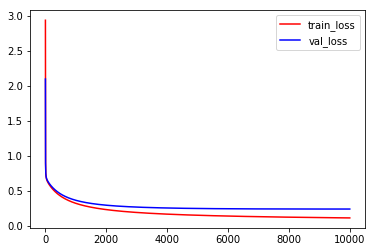

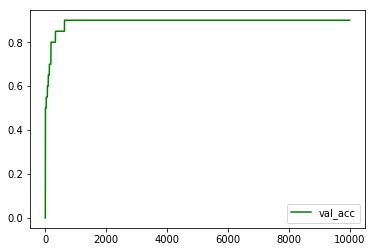

In [124]:
# plot learning curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()

plt.show()

#### multi-target not supportedエラーについて

＜参考＞
https://stackoverflow.com/questions/49206550/pytorch-error-multi-target-not-supported-in-crossentropyloss/49209628

loss関数にyラベルを渡す時、(batchSize x 1)のshapeになるが、これは(batchSize, )のtensorとして認識されない。loss関数に渡す時は、後者の形にする必要があり、この時、squeeze関数を使用すると良い。squeeze()は大きさが1の次元を全て削除した配列を返す。

In [114]:
#NumpyをTensorへ変換、データセット準備
train = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train))
train_loader = torch.utils.data.DataLoader(train, batch_size=20, shuffle=True)
test = torch.utils.data.TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test))
test_loader = torch.utils.data.DataLoader(test, batch_size=20, shuffle=True)

In [116]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(4,1)

    def forward(self, x):
        out = self.linear(x)
        return out


#モデル定義
model6 = LogisticRegression()

#lossとoptimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model6.parameters(), lr=0.01)

#エポック数の指定
for epoch in range(10):
    running_loss = 0.0
    
    for i , data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        #labels = labels.squeeze_()
        
        outputs = model6(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        print('[%d, %5d] loss: %.f3' %(epoch + 1, i + 1, loss.data[0]))

RuntimeError: multi-target not supported at /Users/distiller/project/conda/conda-bld/pytorch_1573049287641/work/aten/src/THNN/generic/ClassNLLCriterion.c:22

### フレームワークの比較

1. **theano**

DLフレームワークの祖父。

  - メリット
    - 計算グラフは見やすく抽象化されている
    - 再帰型ニューラルネットワークは計算グラフに良く適合する
    - 高レベルのラッパー（Keras、Lasagne）により、手間が省ける
  
  - デメリット
    - エラーメッセージが役に立たないことがある
    - 大きなモデルの場合、コンパイルの時間が長くなることがある
    - 事前トレーニングを受けたモデルへのサポートが不十分
    - 単一GPU


2. **TensorFlow**

Googleが開発しているライブラリ。C++で作られているが、Pythonも含まれており柔軟に使用できる構造になっている。

  - メリット
    - 計算グラフの抽象化
    - Theanoよりもコンパイル時間が短い
    - TensorBoardを利用して視覚化が可能
    - データとモデルの並列処理
    
  - デメリット
    - 他のフレームワークより遅い
    - 事前トレーニングされたモデルがあまりない。
    - 計算グラフは単なるPythonなため、遅い。
    - 商用サポートなし。
    - 新しいトレーニングのバッチがあるごとに読み込みをするためにPythonにドロップアウトする
    - 大規模なソフトウェアプロジェクトで動的型付けにエラーが発生しやすい


3. **Caffe**

画像処理を主としたライブラリ。

  - メリット
    - フィードフォワードネットワークと、画像処理に適している。
    - 既存のネットワークの微調整に適している
    - コードを書かずにモデルをトレーニングできる
    
  - デメリット
    - 新しいGPU層にC++/CUDAを書く必要がある。
    - 再帰型ニューラルネットワークには適していない。
    - 大規模なネットワーク（GoogLeNet, ResNet）には使いにくい
    - 拡張性がない
    - 商用サポートがない
    - 開発に時間がかかる


4. **Chainer**

日本で開発されていたライブラリ。2019年12月に開発終了。動的計算グラフのフレームワーク。自然言語処理には人気がある。
  - メリット
    - 直感的な計算グラフの構築が可能
    - デバッグが比較的行いやすい
    
  - デメリット
    - 計算速度が遅くなりがち


5. **Keras**

直感的なAPI、高速計算ライブラリのラッパー

  - メリット
    - 扱いやすい
    - 利用者も多い
    
  - デメリット
    - 処理の中身はコードからは全くわからない
    - オリジナルの処理をさせるのが面倒
    - 計算グラフ構築後、変更不可能
    
6. **pytorch**

chainerに近い構文構造。defined by run。

  - メリット
    - 実行速度が速い
    - 比較的自由に記述できる
    
  - デメリット
    - バッチ処理前提
    - 記述が煩雑になりがち